<a href="https://colab.research.google.com/github/Laxman-Kumar/ISCHOOL-LABS/blob/master/HW07_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IST 687, Standard Homework Heading 

Student name: Laxman Kumar 

Homework number: HW06 

Date due: 07 October 

Attribution statement: (choose the statements that are true) 
1. I did this work by myself, with help from the book and the professor 
2. I did this work with help from the book and the professor and R-studio help section

# <h3>Installing packages and importing them</h2>

In [0]:
#installing ggmap, ggplot2 and zipcode packages
install.packages('ggmap')
install.packages('ggplot2')
install.packages("zipcode")

also installing the dependencies ‘RgoogleMaps’, ‘png’, ‘jpeg’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [0]:
#importing ggplot2, ggmap and zipcode
library(ggplot2)
library(ggmap)
library(zipcode)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


<h3>Below code is used for importing a file into R notebook. Importing medianZIP csv file</h3>

In [0]:

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

library("aws.s3")
obj <- get_object(
    object = "MedianZIP.csv",
    bucket = "ischool-donotdelete-pr-99ljfuordisgkk",
    key = "f2776eac63c34584ac84dbb182a7f0ee",
    secret = "47102b9bfb491957ddcac892cc61731e2243765984368bcd",
    check_region = FALSE,
    base_url = "s3.eu-geo.objectstorage.service.networklayer.com")

mydata <- read.csv(text = rawToChar(obj))



<h3> Code from PW07</h3>

In [0]:
#mydata <- read.csv('MedianZIP.csv',stringsAsFactors = FALSE)
mydata$Mean <- as.numeric(mydata$Mean)

#checking for NAs inthe Mean column of the mydata dataframe
#Replacing the missing values in the mean column for the corresponding value from median column
if(anyNA(mydata$Mean)){
  mydata$Mean[is.na(mydata$Mean)] <- mydata$Median[is.na(mydata$Mean)]
}

#using clean.zipcodes function to format and clean zip in our dataframe
mydata$zip <- clean.zipcodes(mydata$zip)
data(zipcode)

#merging the mydata and zipcode dataframe
dfNew <- merge(mydata, zipcode, by="zip")

#Making a dataframe with statename abb and statename with the coordinates of the center.
stateNameDF <- data.frame(state=state.abb, stateName=state.name, center=state.center)
#changing the case of the statename column to lowercase
stateNameDF$stateName <- tolower(stateNameDF$stateName)
head(stateNameDF)

#merging dfNew and statenameDF dataframe into a new dataframe
dfNew <- merge(dfNew,stateNameDF,by="state")

state,stateName,center.x,center.y
AL,alabama,-86.7509,32.5901
AK,alaska,-127.2500,49.2500
AZ,arizona,-111.6250,34.2192
AR,arkansas,-92.2992,34.7336
CA,california,-119.7730,36.5341
CO,colorado,-105.5130,38.6777


# <h2>Step 1:  Plot points for each zipcode (don’t forget to library ggplot2 and ggmap)</h2>

<h3>A.	Code and execute the following lines of code</h3>
<h3>B.	Comment each line of code explaining what it does.</h3>

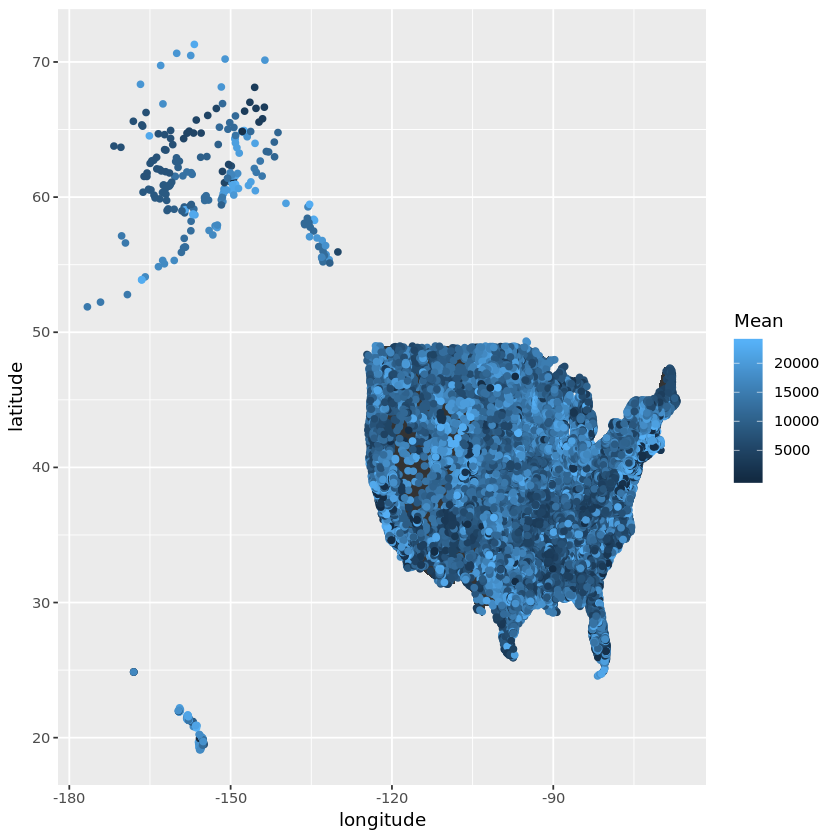

In [0]:
#builing a map_data object of states
us <- map_data("state")

#creating a reference to the ggplot with data passed as dfNew and map_id referenced to statename
dotmap<- ggplot(dfNew, aes(map_id = stateName))

#adding the geometry geom_map to the ggplot object created before
dotmap<- dotmap + geom_map(map = us)

#adding the geometry geom_point to the ggplot refenced object
dotmap<- dotmap + geom_point(aes(x=longitude,y=latitude,color=Mean))

#viewing the dotmap object
dotmap


<h3>C.	Add a block comment that criticizes the resulting map. It’s not very good (but you need to explain why it is not very good).</h3>


We cannot deduce anything by looking at the map. It would be better if the map is labelled by city or state. Also the map seems crowded and difficult to decode the color scheme  used. Since its plotted by just latitudes and longitudes irrespective of city or state, this results in various ovelapping points and deducing anything from above chart is difficult. The graph also misses the labelling which what particular point on the map indicatees, it would be proper to label each point i.e indicate the city or state.

<h2>Step 2:  Use Tidyverse to create a Data Frame of State-by-State Income</h2>

<h3>A.	Library the tidyverse() package (if you have not already done so), and then run the following command to create a new data frame:</h3>
<h3>B.	Add a comment after each line, describing what each line of code does. Make sure to describe how many rows there are in the new dataframe, and how the new dataframe was created.</h3>


In [0]:
install.packages('tidyverse')
library(tidyverse)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::map()    masks maps::map()


In [0]:
#creating a new summaryDF which consists of statename, totalPop and Income
#Using tidyverse syntax,
#creating a reference to dfNew
summaryDF <- dfNew %>%
    #grouping the statename column
    group_by(stateName) %>%
    #using summarize method to create sum of population and sum of mean*pop group by statename
    summarize(totalPop=sum(Pop), Income=sum(Mean*Pop))

In [0]:
head(summaryDF)

stateName,totalPop,Income
alabama,4770242,53353550438
alaska,703159,11619771677
arizona,6360679,78968043704
arkansas,2936699,29456627378
california,36927999,476076095813
colorado,4979279,65824373836


In [0]:
paste("Number of rows in the summaryDF dataframe ",nrow(summaryDF))

[1] "Number of rows in the summaryDF dataframe  50"

In [0]:
#New dataframe was created by grouping the statename column and finding the sum of population and mean*pop. 
#Sum was calculated after grouping the column by statename

<h3>C.	Create a new variable on this data frame called meanIncome. Divide Income by totalPop to find the average income for each state.</h3>

In [0]:
#adding new column named meanIncome which is calculated by divinde the income column by totalPop
summaryDF['meanIncome'] <- summaryDF['Income']/summaryDF['totalPop']


In [0]:
head(summaryDF)

stateName,totalPop,Income,meanIncome
alabama,4770242,53353550438,11184.66
alaska,703159,11619771677,16525.10
arizona,6360679,78968043704,12415.03
arkansas,2936699,29456627378,10030.52
california,36927999,476076095813,12892.01
colorado,4979279,65824373836,13219.66


<h2>Step 3:  Create a map of the U.S. showing average income</h2>

<h3>A.	Create a map visualization, where the color of each state represents the mean income for that state.</h3>

<h3>B.	If you need help creating the map, review Chapter 13, and how Figure 13.2 was created.</h3>
<h3>C.	You will notice some states are grey. In a block comment explain why they are grey</h3>
<h3>D.	Fix this issue so that all states have an appropriate shade of blue – i.e.,  generate the map visualization, where the color of each state represents the mean income for that state without any state being grey (hint: look if there are NAs).</h3>


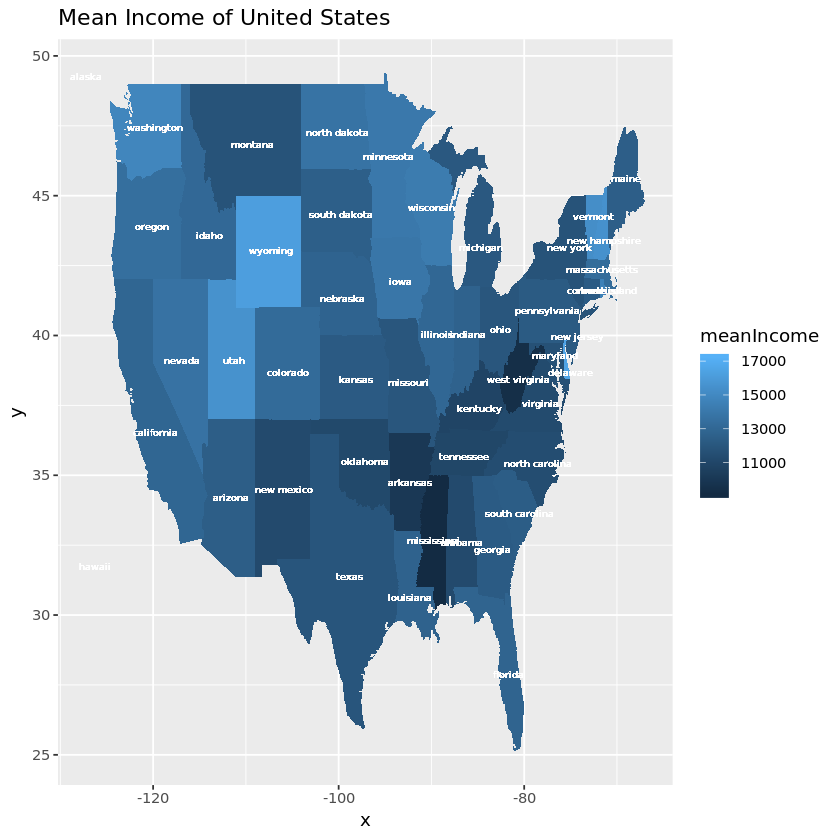

In [0]:
#creating a reference to the ggplot with data passed as dfNew and map_id referenced to statename
coloredPlot<- ggplot(summaryDF, aes(map_id = stateName))

#adding the geometry geom_map to the ggplot object created before
coloredPlot<- coloredPlot + geom_map(map = us,aes(fill=meanIncome))

#adding the geometry geom_point to the ggplot refenced object
coloredPlot<- coloredPlot + expand_limits(x=us$long,y=us$lat) + 
#adding title to the map
ggtitle("Mean Income of United States")+
#adding the geom_text for displaying statename at the center of each state
geom_text(data=dfNew, aes(center.x, center.y, label = stateName),color='white', size=2) 

#viewing the dotmap object
coloredPlot


#Since I had already encounters the NAs in the dataset, therefore we cannot see any grey region in the map. 
#Grey region could be generated if there is missing value in particular cell. By fixing the missing value by replacement or iterpolation
#grey region can be taken care of.

<h2>Step 4:  Show the population of each state on the map</h2>
<h3>A.	Use the stateNameDF (that was created and used in the prework) and merge that dataframe with the summaryDF dataframe, so that the center.x and center.y information is merged with the summaryDF dataframe information in your new dataframe.</h3>



In [0]:
#merging stateNameDF and summaryDF dataframes
newSummaryDF <- merge(summaryDF,stateNameDF,by="stateName")
head(newSummaryDF)

stateName,totalPop,Income,meanIncome,state,center.x,center.y
alabama,4770242,53353550438,11184.66,AL,-86.7509,32.5901
alaska,703159,11619771677,16525.10,AK,-127.2500,49.2500
arizona,6360679,78968043704,12415.03,AZ,-111.6250,34.2192
arkansas,2936699,29456627378,10030.52,AR,-92.2992,34.7336
california,36927999,476076095813,12892.01,CA,-119.7730,36.5341
colorado,4979279,65824373836,13219.66,CO,-105.5130,38.6777


<h3>B.	Create a new map visualization, which is the same visualization created in step 3, but now add a new layer, with a point, at the center of each state, where the point size represents the total population of that state.</h3>
<h3>C.	If you need a hint on how to do this visualization, you need to have a center.x and center.y in your summaryDF (i.e., you need to create a new summaryDF with center.x and center.y).</h3>

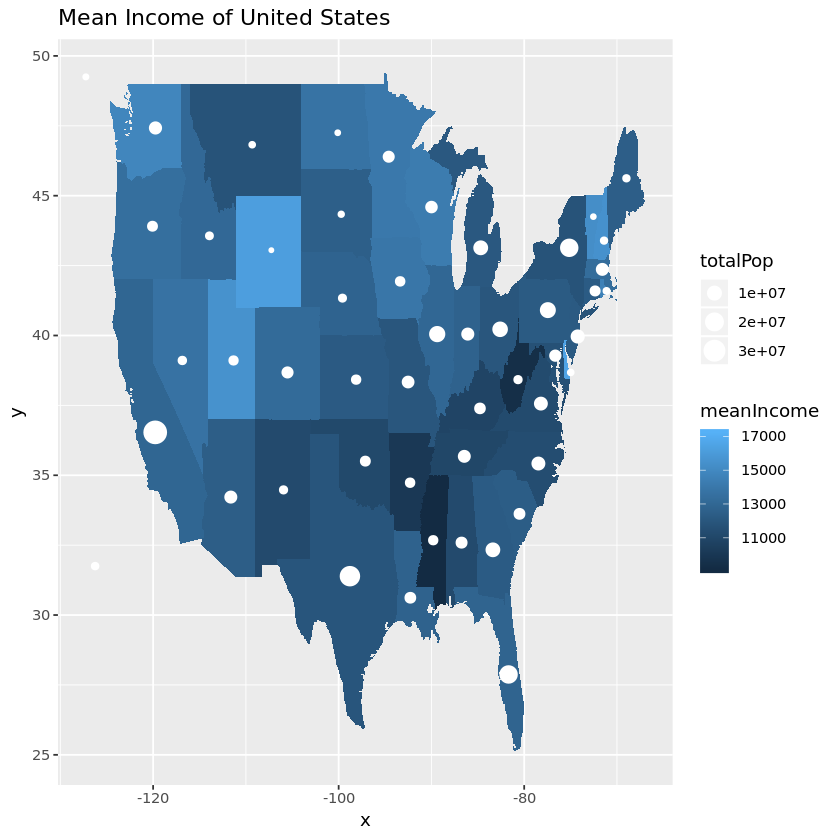

In [0]:
#creating a reference to the ggplot with data passed as dfNew and map_id referenced to statename
coloredPlot<- ggplot(newSummaryDF, aes(map_id = stateName))

#adding the geometry geom_map to the ggplot object created before
coloredPlot<- coloredPlot + geom_map(map = us,aes(fill=meanIncome))

#adding the geometry geom_point to the ggplot refenced object
coloredPlot<- coloredPlot + expand_limits(x=us$long,y=us$lat) + ggtitle("Mean Income of United States")

#displaying points at the center of each state whose size represents the corresponding totalPop.
coloredPlot <- coloredPlot+geom_point(aes(x=center.x,y=center.y,size=totalPop),color="white")
coloredPlot